<a href="https://colab.research.google.com/github/JoaoVlopess/python-Algorithms-Projects/blob/main/rede_social_grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Criar o arquivo rede_social.txt diretamente no Colab

rede_social = """João Pedro: João Victor, Amanda, Isaac Newton
João Victor: João Pedro, Luis Eduardo Barrocas, Raimir
Amanda: João Pedro, Luma Brandão, Kaylany
Amilton: Isaac Newton, Luis Eduardo Barrocas
Isaac Newton: João Pedro, Amilton, Raimir
Luis Eduardo Barrocas: João Victor, Amilton, Luma Brandão
Raimir: João Victor, Isaac Newton, Pim
Pim: Raimir, Kaylany
Luma Brandão: Amanda, Luis Eduardo Barrocas, Kaylany
Kaylany: Amanda, Pim, Luma Brandão
"""

# Cria o arquivo e salva no diretório atual do Colab
with open("rede_social.txt", "w", encoding="utf-8") as f:
    f.write(rede_social)

print("Arquivo 'rede_social.txt' criado com sucesso!")


Arquivo 'rede_social.txt' criado com sucesso!


Usuário de partida: Raimir
Usuário de chegada: Amilton

Caminho mais curto encontrado (2 conexões):
Raimir → Isaac Newton → Amilton


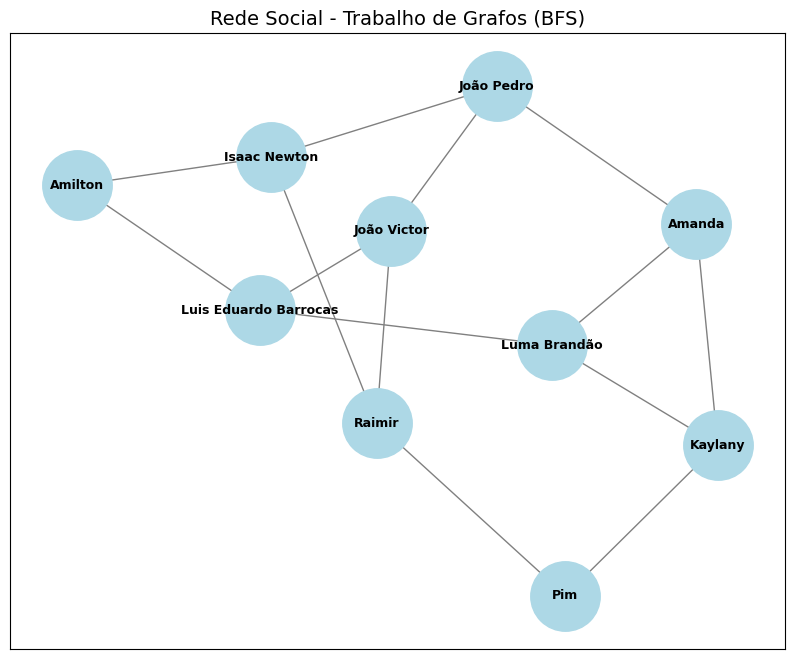

In [ ]:


import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

#Função para ler a rede social de um arquivo externo
def carregar_rede(arquivo):
    grafo = {}
    with open(arquivo, "r", encoding="utf-8") as f:
        for linha in f:
            if ":" in linha:
                usuario, amigos = linha.strip().split(":")
                grafo[usuario.strip()] = [a.strip() for a in amigos.split(",")]
    return grafo


#Algoritmo de Busca em Largura (BFS)
def bfs_caminho_mais_curto(grafo, inicio, fim):
    visitados = set()
    fila = deque([[inicio]])

    while fila:
        caminho = fila.popleft()
        no = caminho[-1]

        if no == fim:
            return caminho

        if no not in visitados:
            visitados.add(no)
            for vizinho in grafo.get(no, []):
                novo_caminho = list(caminho)
                novo_caminho.append(vizinho)
                fila.append(novo_caminho)
    return None


#Visualizar a rede com NetworkX

def desenhar_rede(grafo):
    G = nx.Graph()

    # Adiciona arestas (amizades)
    for usuario, amigos in grafo.items():
        for amigo in amigos:
            G.add_edge(usuario, amigo)

    plt.figure(figsize=(10, 8))
    nx.draw_networkx(
        G,
        with_labels=True,
        node_color="lightblue",
        node_size=2500,
        font_size=9,
        font_weight="bold",
        edge_color="gray"
    )
    plt.title("Rede Social - Trabalho de Grafos (BFS)", fontsize=14)
    plt.show()



#Execução principal

arquivo_rede = "rede_social.txt"
grafo = carregar_rede(arquivo_rede)

usuario_inicio = "Raimir"
usuario_fim = "Amilton"

caminho = bfs_caminho_mais_curto(grafo, usuario_inicio, usuario_fim)

print("Usuário de partida:", usuario_inicio)
print("Usuário de chegada:", usuario_fim)

if caminho:
    print(f"\nCaminho mais curto encontrado ({len(caminho)-1} conexões):")
    print(" → ".join(caminho))
else:
    print(" Não existe conexão entre esses usuários.")

# Visualização
desenhar_rede(grafo)
